<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

### Dataset

In [31]:
# Load the dataset
noise = pd.read_csv(
    "data/airfoil_self_noise.dat",
    delimiter="\t",
    names=[
        "frequency",
        "angle",
        "chord_length",
        "free_stream_velocity",
        "displacement_thickness",
        "self_noise",
    ],
)

- Read about this dataset [here](http://archive.ics.uci.edu/dataset/291/airfoil+self+noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

A model could be helpful because we could try to look for correlations between our variables. For example, we could try to find what (if any) correlation there is between the chord length and the scaled sound pressure. Perhaps there is no correlation, a positive correlation (as we increase one, so does the other) or a negative correlation (as one increases, the other decreases). Since this is a multivariate dataset, we can also benefit from performing a heatmap of the correlation matrix to get an overview of correlations between all of our variables. 

- Find out how many rows and columns are in `noise`.

In [80]:
# Shows how many rows and columns there are
noise.shape

(1503, 6)

- Find out what data types are present.

In [81]:
# Shows types of data
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each column.

In [82]:
# Shows how many null values there are 
noise.isnull().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [84]:
# Describes our data for each column, showing things like std and
# mean.
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

Text(0.5, 1.0, 'Frequency Histogram')

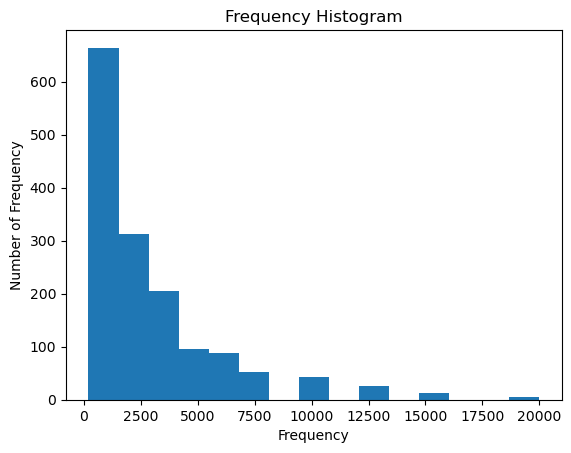

In [85]:
# Plots a histogram of frequency
plt.hist(noise['frequency'], bins=15)
plt.xlabel('Frequency')
plt.ylabel('Number of Frequency')
plt.title('Frequency Histogram')

Text(0.5, 1.0, 'Angle')

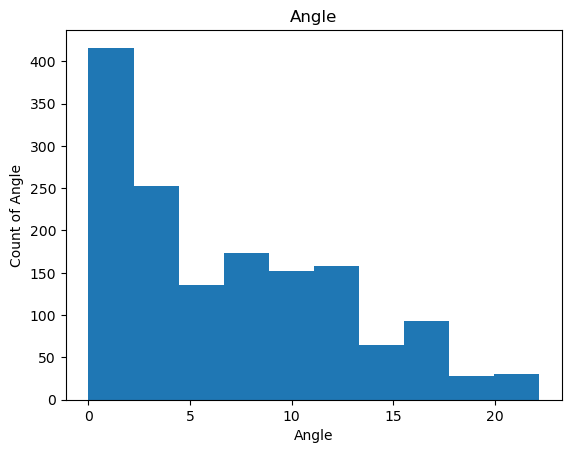

In [3]:
# Plots a histogram for angle
plt.hist(noise['angle'], bins=10)
plt.xlabel('Angle')
plt.ylabel('Count of Angle')
plt.title('Count of Angle')

Text(0.5, 1.0, 'Histogram of Self Noise')

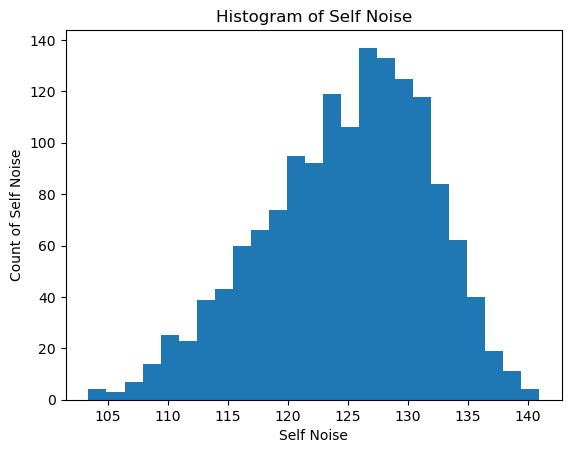

In [4]:
# Plots a histogram for self noise
plt.hist(noise['self_noise'], bins=25)
plt.xlabel('Self Noise')
plt.ylabel('Count of Self Noise')
plt.title('Histogram of Self Noise')

Text(0.5, 1.0, 'Displacement Thickness Histogram')

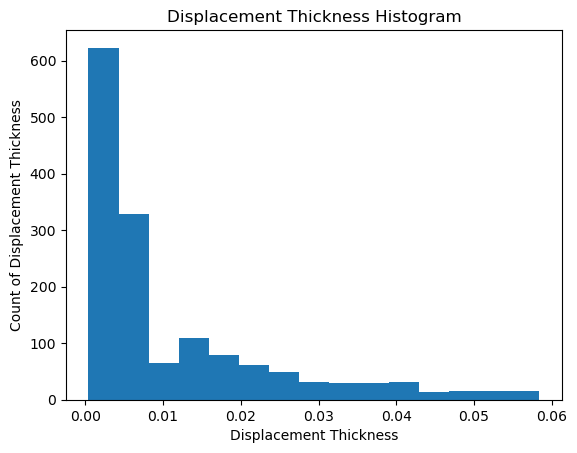

In [5]:
# Plots a histogram for displacement thickness
plt.hist(noise['displacement_thickness'], bins=15)
plt.xlabel('Displacement Thickness')
plt.ylabel('Count of Displacement Thickness')
plt.title('Displacement Thickness Histogram')

Text(0.5, 1.0, 'Chord Length Box Plot')

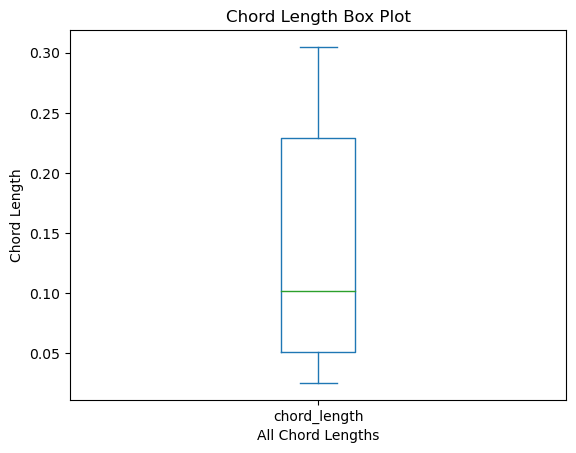

In [8]:
# Plots a box plot for chord length
noise['chord_length'].plot(kind='box')
plt.xlabel('All Chord Lengths')
plt.ylabel('Chord Length')
plt.title('Chord Length Box Plot')

Text(0.5, 1.0, 'Free Stream Velocity Box')

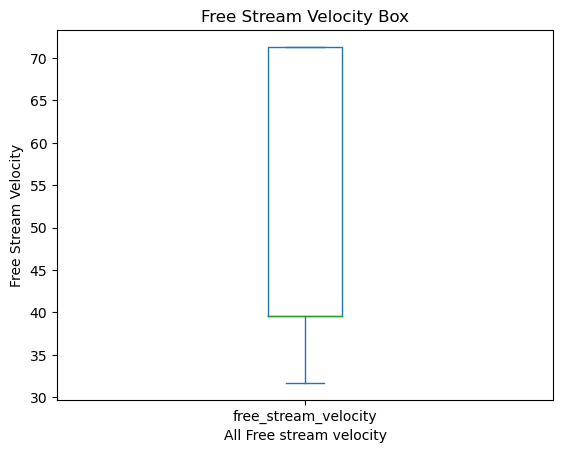

In [9]:
# Plots a box plot for free stream velocity
noise['free_stream_velocity'].plot(kind='box')
plt.xlabel('All Free stream velocity')
plt.ylabel('Free Stream Velocity')
plt.title('Free Stream Velocity Box')

- Which variables are approximately normally distributed?

Self noise and chord thickness.

- Which variables show strong skew?

All other variables aside from self noise and chord thickness.

- Make a scatterplot of each feature variable with the target variable "self_noise".

C:\Users\Paulm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Paulm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Paulm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Paulm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Paulm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


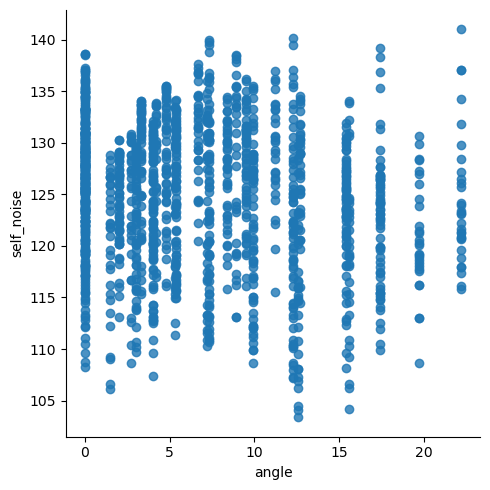

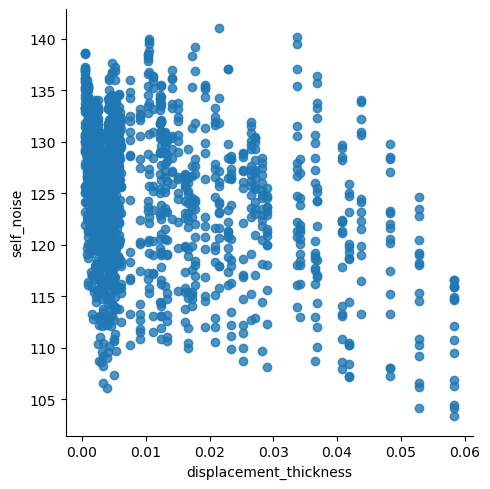

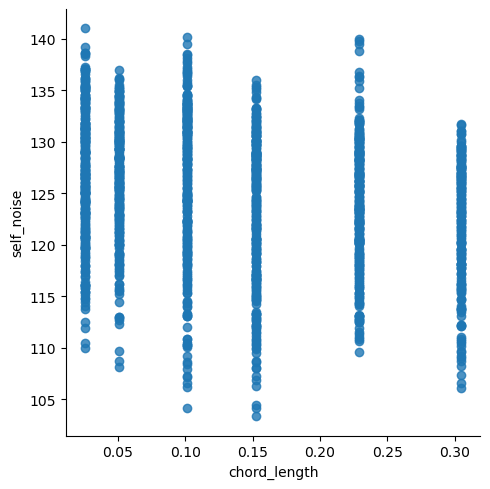

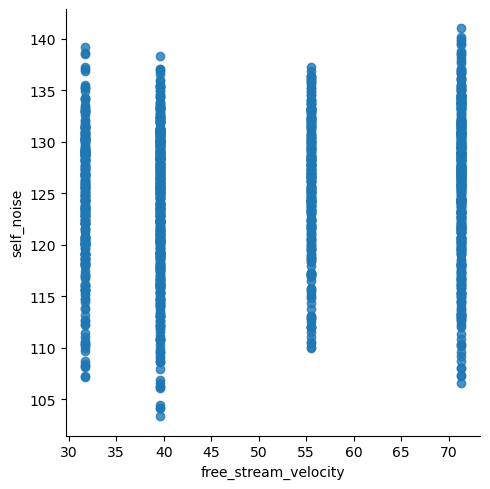

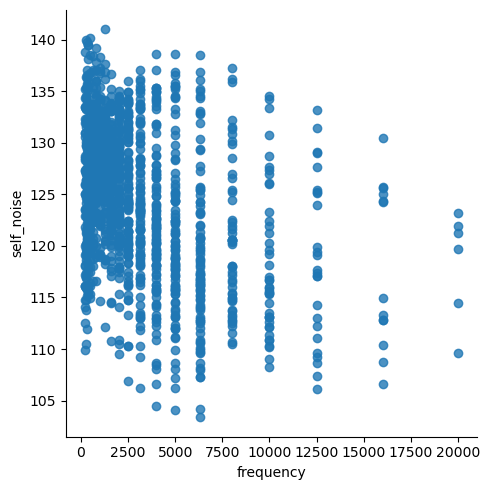

In [16]:
# Make 5 scatterplots, with each compared to self nosie
sns.lmplot(x = 'angle', y = 'self_noise', data=noise, ci=None, fit_reg=False);
sns.lmplot(x = 'displacement_thickness', y = 'self_noise', data=noise, ci=None, fit_reg=False);
sns.lmplot(x = 'chord_length', y = 'self_noise', data=noise, ci=None, fit_reg=False);
sns.lmplot(x = 'free_stream_velocity', y = 'self_noise', data=noise, ci=None, fit_reg=False);
sns.lmplot(x = 'frequency', y = 'self_noise', data=noise, ci=None, fit_reg=False);

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

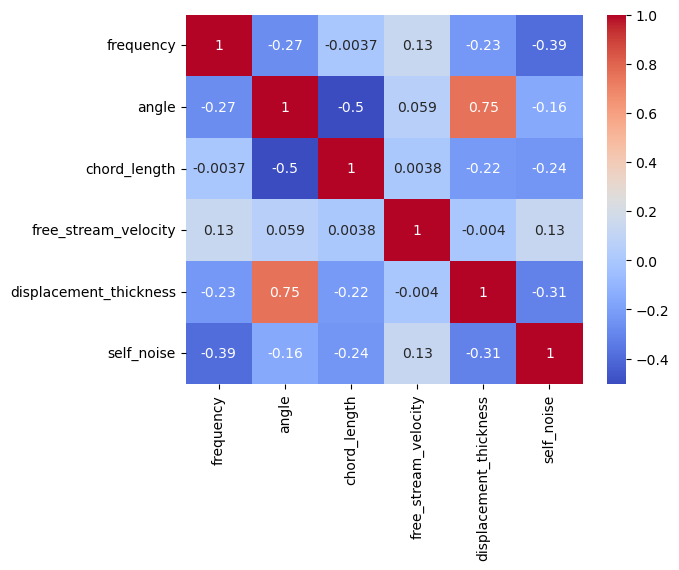

In [17]:
# Plots a heatmap of our correlation matrix
sns.heatmap(noise.corr(), annot=True, cmap='coolwarm');

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

I would adapt my model to investigate and test the stronger correlations. For example, I'd want to investigate how angle and displacement thickness could be correlated with self noise, so I could make a new column of data by mutilplying displacement thickness and angle, and then adding that to my model when I train and test for our dependent variable, self noise.

### Linear Regression

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Get its R-squared score on both that train and test sets. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [30]:
# Import everything we need
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
# From here on, our code is code borrowed from/adapted from the class notes
# Make our independent variable into a dataframe
feature_cols_2 = ['angle', 'frequency', 'chord_length', 'free_stream_velocity',
                 'displacement_thickness']
# Rename it for simplicity
X = noise[feature_cols_2]
# Make our dependent variable, or target variable, into an array
y = noise['self_noise']

# Shortcut our LinearRegression name
lr = LinearRegression()

# Split our model so we have 70% training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a NumPy array with same shape as y_train
y_null = np.zeros_like(y_train, dtype=float)

# Fill array with mean value of y_train
y_null.fill(y_train.mean())

# Fit/train our model to learn the relationship between x and y
lr.fit(X_train,y_train)

# Predict our dependent variable
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

# Calculate our R-squared score
print("R2 Score for Test Data:", r2_score(y_test, y_pred_test))
print("R2 Score for Training Data:", r2_score(y_train, y_pred_train))
print("R2 Score for Null Data:", r2_score(y_null, y_pred_train))
print("******************")
#Calculate our RMSE
print("RMSE for Test Data:", mean_squared_error(y_test, y_pred_test, squared = False))
print("RMSE for Training Data:", mean_squared_error(y_train, y_pred_train, squared = False))
print("RMSE for Null Data:", mean_squared_error(y_null, y_pred_train, squared = False))

R2 Score for Test Data: 0.48136907614119717
R2 Score for Training Data: 0.5298340029089575
R2 Score for Null Data: 0.0
******************
RMSE for Test Data: 5.046193393139996
RMSE for Training Data: 4.695447526912868
RMSE for Null Data: 4.984496507977757


- How well did your model perform on the _training_ set compared to the null model? What does this result tell you about the bias and/or variance of your model?

 - Our model definitely learned, as we can tell by looking at our RMSE for training and test are lower than the null. The test data is similar to the null, so we can't say it's a highly performative model. Based on this, it would be a good idea to try do some cross validation. We have low variance and low bias according to our results.


- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

- Our model had similar results with our training and testing data, telling us we have low variance. Our R2 scores were ~.5, showing low bias. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

I would say we have more of a bias problem than a variance problem, because our bias could be better, meanwhile, it's not a bad thing that our testing and training data have similar results. 

### Random Forest

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

You can do this exercise even if we haven't covered random forests in class yet. Just do `from sklearn.ensemble import RandomForestRegressor` and then use `RandomForestRegressor` like any other scikit-learn estimator.

In [ ]:
# BONUS

- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

In [ ]:
# BONUS

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [ ]:
# BONUS

In [ ]:
# BONUS

- **BONUS:** Keep going! Find ways to make your model better.

In [ ]:
# BONUS

## Classification

### Dataset

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

It's a multivariable dataset, with a lot of moving parts. There are many variables that could be influencing one or more other variables. Figuring out in which direction the variables are affecting each other is a question for later analysis, but I think a model would be great for investigating correlations and trying to predict our target variable, column 16.

In [43]:
# Load the dataset
credit = pd.read_csv("data/crx.data", names=range(1, 17))

- Find out how many rows and columns are in `credit`.

In [44]:
# This lets us find out how many rows and columns we have
credit.shape

(690, 16)

- Find out what data types are present.

In [45]:
# Checks the types of data types 
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [46]:
# Take a quick look at our data
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [47]:
# First, we replace all of our "?" with nulls, and drop those nulls
credit = credit.replace(to_replace=["?"], value=np.nan)
credit = credit.dropna()
# Now, we convert our columns into floats
credit[2] = credit[2].astype(float)
credit[14] = credit[14].astype(float)
# Lastly, let's check our types
credit.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14    float64
15      int64
16     object
dtype: object

- Find out how many null values there are in each columns.

In [48]:
# Tells us how many nulls we have in our data
credit.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [42]:
# Get descriptions of our data, get to see things like mean, std, etc.
credit.describe(include='all')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,653,653.000000,653.000000,653,653,653,653,653.000000,653,653,653.000000,653,653,653.000000,653.000000,653
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,450,NaN,NaN,499,499,133,381,NaN,349,366,NaN,351,598,NaN,NaN,357
mean,NaN,31.503813,4.829533,NaN,NaN,NaN,NaN,2.244296,NaN,NaN,2.502297,NaN,NaN,180.359877,1013.761103,NaN
std,NaN,11.838267,5.027077,NaN,NaN,NaN,NaN,3.371120,NaN,NaN,4.968497,NaN,NaN,168.296811,5253.278504,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.580000,1.040000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,73.000000,0.000000,NaN
50%,NaN,28.420000,2.835000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.250000,7.500000,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.000000,NaN,NaN,272.000000,400.000000,NaN


Text(0, 0.5, 'Count')

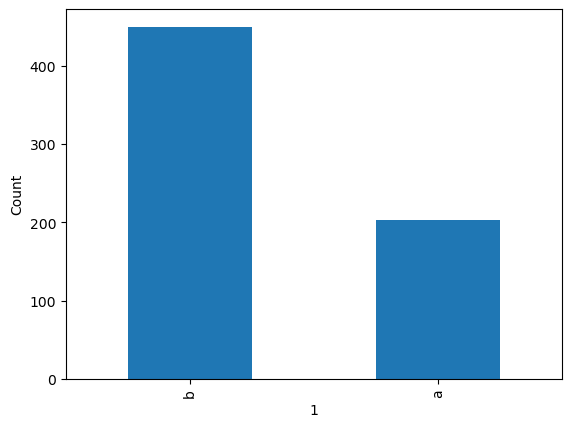

In [15]:
# Plots a bar chart for us
Count = credit[1].value_counts()
Count.plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

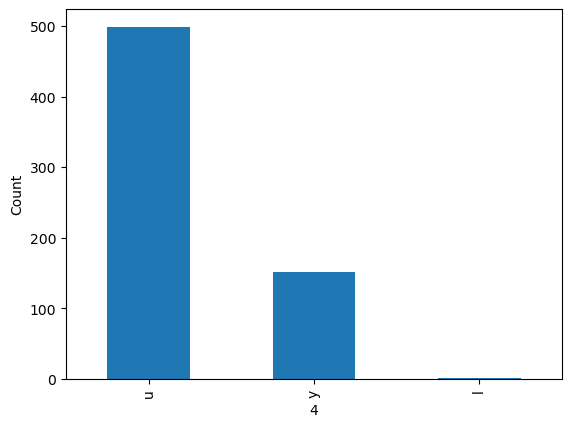

In [16]:
# Plots a bar chart for us
Count = credit[4].value_counts()
Count.plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

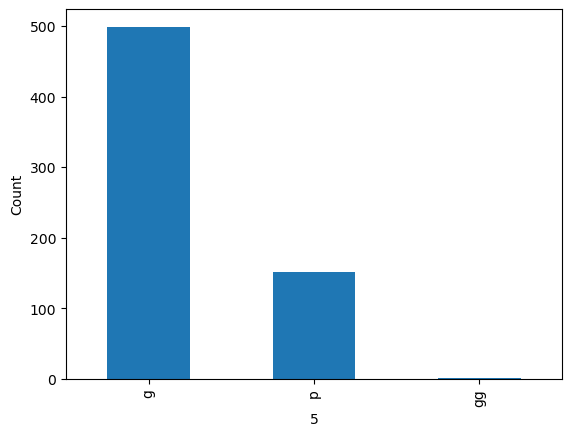

In [17]:
# Plots a bar chart for us
Count = credit[5].value_counts()
Count.plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

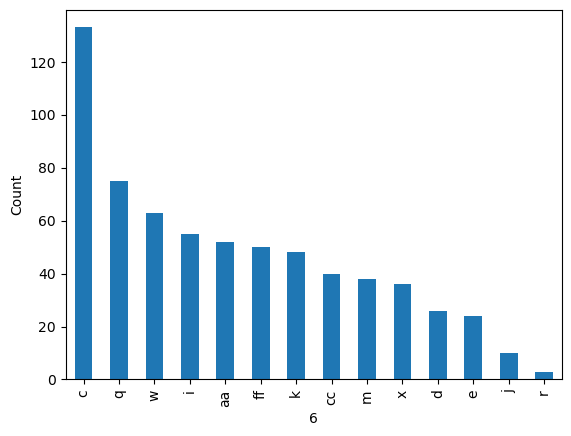

In [18]:
# Plots a bar chart for us
Count = credit[6].value_counts()
Count.plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

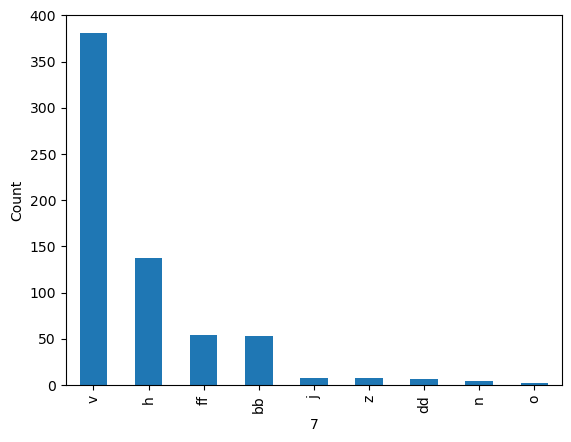

In [19]:
# Plots a bar chart for us
Count = credit[7].value_counts()
Count.plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

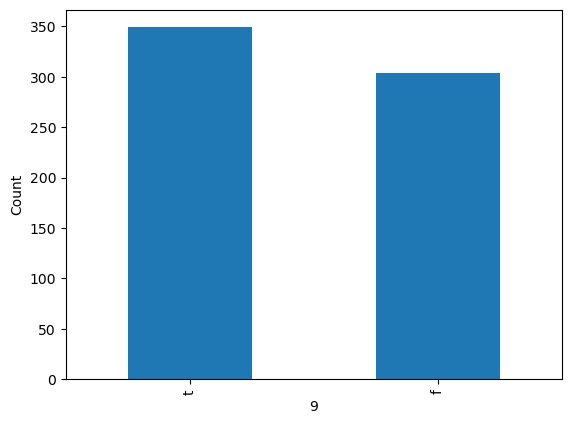

In [20]:
# Plots a bar chart for us
Count = credit[9].value_counts()
Count.plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

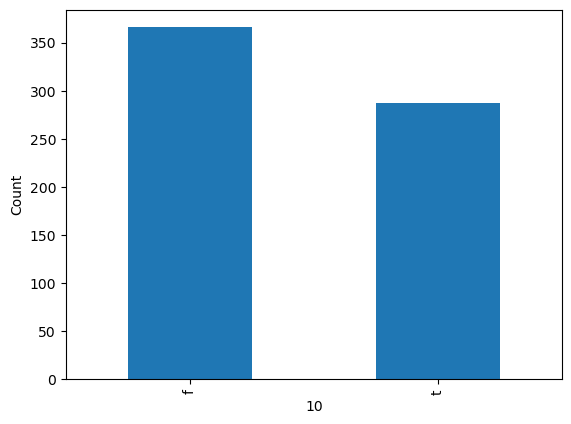

In [21]:
# Plots a bar chart for us
Count = credit[10].value_counts()
Count.plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

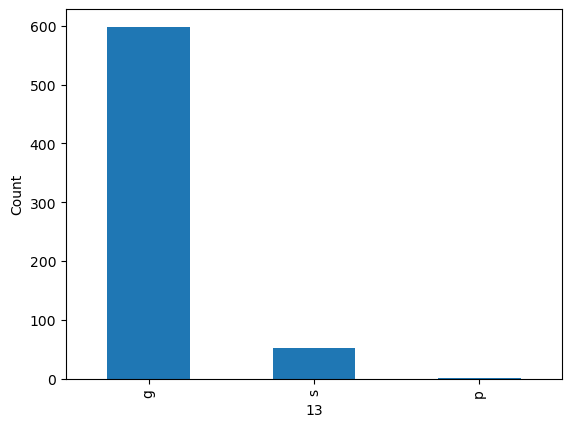

In [22]:
# Plots a bar chart for us
Count = credit[13].value_counts()
Count.plot(kind='bar')
plt.ylabel('Count')

- Plot the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

Text(0, 0.5, 'Count')

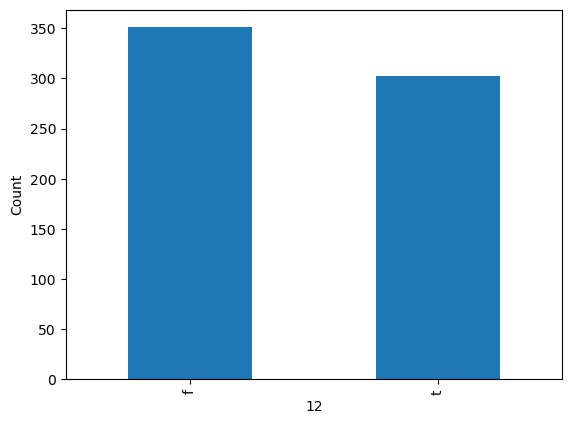

In [23]:
# Plots a bar chart for us
Count = credit[12].value_counts()
Count.plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

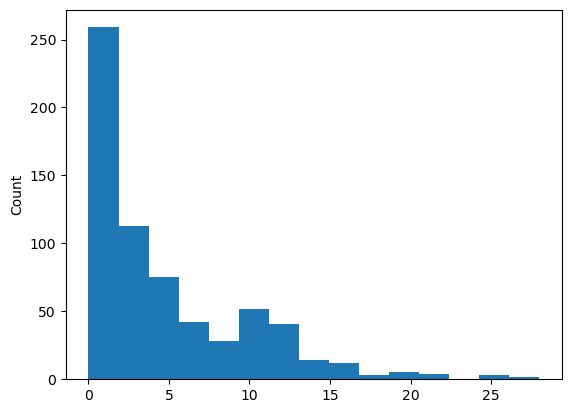

In [24]:
# Plots a histogram for us
plt.hist(credit[3], bins=15)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

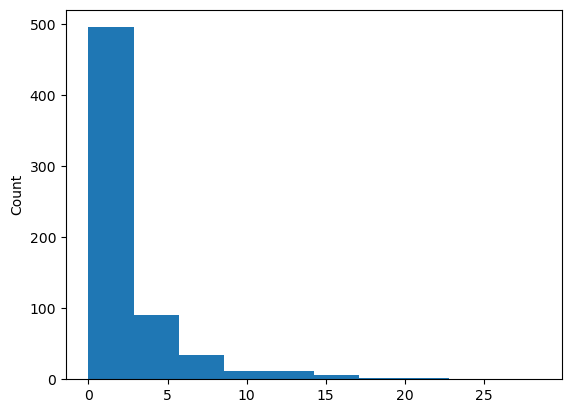

In [25]:
# Plots a histogram for us
plt.hist(credit[8], bins=10)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

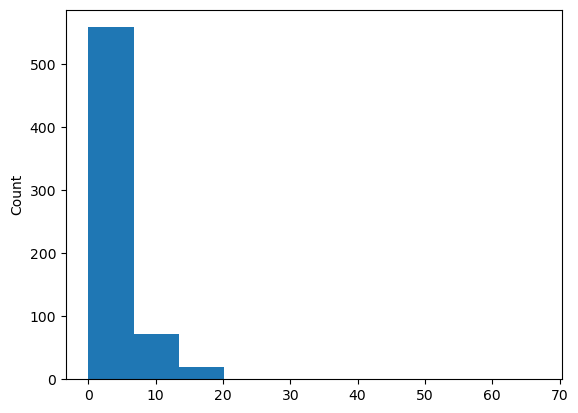

In [26]:
# Plots a histogram for us
plt.hist(credit[11], bins=10)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

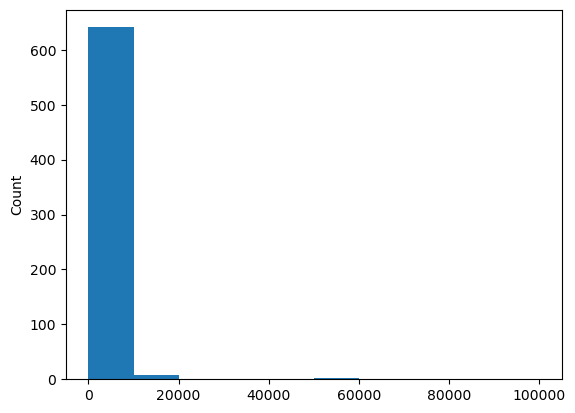

In [27]:
# Plots a histogram for us
plt.hist(credit[15], bins=10)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

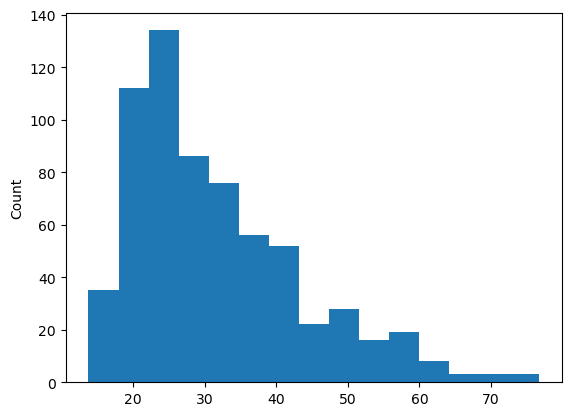

In [28]:
# Plots a histogram for us
plt.hist(credit[2], bins=15)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

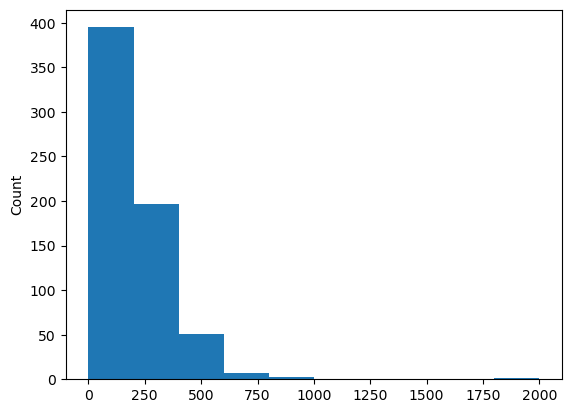

In [29]:
# Plots a histogram for us
plt.hist(credit[14], bins=10)
plt.ylabel('Count')

- Which variables are approximately normally distributed?

The closest one to being normally distributed is column 2.

- Which variables show strong skew?

All of them (aside from the data from column 2, you could argue)

In [49]:
# Here, we are "dummifying" our non-numerical data, and adding columns for every categorical value as "True False" arrays. 
# This is an attempt at making our non-numerical data into "numerical" data.
dummy_16 = pd.get_dummies(credit[16], prefix = '16', drop_first=True)
dummy_12 = pd.get_dummies(credit[12], prefix = '12', drop_first=True)
dummy_10 = pd.get_dummies(credit[10], prefix = '10', drop_first=True)
dummy_9 = pd.get_dummies(credit[9], prefix = '9', drop_first=True)
dummy_1 = pd.get_dummies(credit[1], prefix = '1', drop_first=True)
dummy_7 = pd.get_dummies(credit[7], prefix = '7', drop_first=True)
dummy_4 = pd.get_dummies(credit[4], prefix = '4', drop_first=True)
dummy_5 = pd.get_dummies(credit[5], prefix = '5', drop_first=True)
dummy_6 = pd.get_dummies(credit[6], prefix = '6', drop_first=True)
dummy_13 = pd.get_dummies(credit[13], prefix = '13', drop_first=True)

In [50]:
# Here, we are adding those dummy columns to our dataframe
credit = pd.concat([credit, dummy_16], axis=1)
credit = pd.concat([credit, dummy_12], axis=1)
credit = pd.concat([credit, dummy_10], axis=1)
credit = pd.concat([credit, dummy_9], axis=1)
credit = pd.concat([credit, dummy_1], axis=1)
credit = pd.concat([credit, dummy_7], axis=1)
credit = pd.concat([credit, dummy_4], axis=1)
credit = pd.concat([credit, dummy_5], axis=1)
credit = pd.concat([credit, dummy_6], axis=1)
credit = pd.concat([credit, dummy_13], axis=1)

# Here we're dropping the original columns since we don't need them anymore. 
credit = credit.drop(columns= [16, 12, 10, 9, 1, 7, 4, 5, 6, 13])
# Quick look at our data
credit.head()

# Here we convert our columns names into strings to simplify when we want to call upon our columns later for 
# data visualization
credit.columns = credit.columns.astype(str)

- Make a scatterplot of each feature variable with the target variable (`16`).

C:\Users\Paulm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


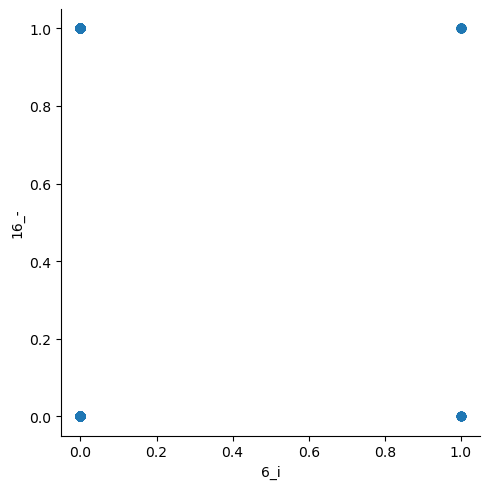

In [11]:
# This will make a scatterplot for 6_i and 16_-
# Was told I only need to make a couple of scatterplot graphs instead of 
# all columns
sns.lmplot(x = '6_i', y = '16_-', data=credit, ci=None, fit_reg=False);

C:\Users\Paulm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


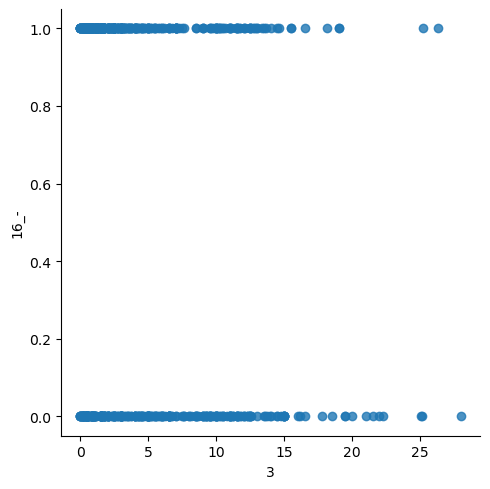

In [37]:
# Need to convert our column names into strings to make it easier
credit.columns = credit.columns.astype(str)
# This makes our scatterplot
sns.lmplot(x = '3', y = '16_-', data=credit, ci=None, fit_reg=False);

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

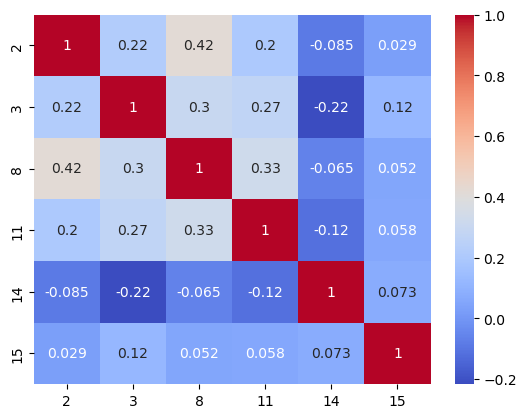

In [77]:
# Need to make a dataframe with just the numeric columns
num_credit = credit[['2', '3', '8', '11', '14', '15']]
# Plot hour correlation matrix as a heatmap with that dataframe
sns.heatmap(num_credit.corr(), annot=True, cmap='coolwarm');

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

I would adapt my model to investigate and test the stronger correlations. For example, I'd want to investigate how 8 and 2 could be correlated with 16, so I could make a new column of data by mutilplying columns 8 and 2, and then adding that to my model when I train and test for our dependent variable, 16.

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

A null model based on the mode would only be as accurate as the most common outcome it has fed into it. For example, if your most common outcome was in 50% of the data, the model would only be accurate 50% of the time.

### Logistic Regression

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [51]:
# Import everything we need
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyRegressor
from sklearn import model_selection, metrics 

In [58]:
# From here on, our code is code borrowed from/adapted from the class notes
# Shortcutting our name for calling upon logistricregression
logreg = LogisticRegression()
# Here we make our array equal to our string conversion of the column headers from earlier
feature_cols_3 = credit.columns

# Establish our dependent and independent variables
X = credit[feature_cols_3]
y = credit['16_-']

# Make our split model, training on 70% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Fit our model
logreg.fit(X_train, y_train)
# Now, we're asking our trained model based on our X_train, what our output (pred) would be
pred = logreg.predict(X_train)
# Lastly, we check to see how accurate our models are for the training and test data
print("Our training score is:" ,logreg.score(X_train, y_train))
print("Our testing score is:" ,logreg.score(X_test, y_test))

Our training score is: 0.9846827133479212
Our testing score is: 0.9846938775510204


C:\Users\Paulm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

In [59]:
# We need to create a null model
# From here on, our code is code taken from/adapted from the class notes
# First, let's create a NumPy array with the same shape as y_train
y_null = np.zeros_like(y_train, dtype=float)

# Fill the array with the mean value of y_train
y_null.fill(y_train.mean())
# Convert our pred array from an array of "true false" to 1's and 0's.
pred = pred.astype(int)

# Calculate our R2 and RMSE of our null and training model.
# We're basically looking to see if our trained model did any better than if it never got trained in the first place (null model)
print("R2 Score for Training Data:", r2_score(y_train, pred))
print("R2 Score for Null:", r2_score(y_train, y_null))
print("RMSE for Training Data:", mean_squared_error(y_train, pred, squared = False))
print("RMSE for Null Data:", mean_squared_error(y_train, y_null, squared = False))

R2 Score for Training Data: 0.9383693599969175
R2 Score for Null: 0.0
RMSE for Training Data: 0.12376302619150346
RMSE for Null Data: 0.4985314729885294


Our training set performed better than the null model since we have a much lower RMSE for our training data than the null model. In regards to our bias and variance, our training model has a lower bias than the null model, and we have a moderate amount of variance since our null and training RMSE's and R2's were different enough from each other. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

They performed very similarly. The scores were high, telling us they performed well and have low bias, so we have a pretty accurate model. The two scores were very similar, suggesting low variance for our model. 

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

We have more of a bias problem than a variance problem (I think), because our scores were close to 1, but both the testing and training scores were very similar to each other (showing low variance). It's hard to say since the model has both low bias and variance, so I'd like to say that they don't really have a problem with either, but if I had to pick one, I'd say it has more of a bias problem. 

### Random Forest

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R-squared score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

You can do this exercise even if we haven't covered random forests in class yet. Just do `from sklearn.ensemble import RandomForestClassifier` and then use `RandomForestClassifier` like any other scikit-learn estimator.

In [ ]:
# BONUS

- Compare the bias, variance, and overall predictive performance of your random forest model to that of your logistic regression model.

In [ ]:
# BONUS

- Find a way to get a better score from either logistic regression or a random forest. Make notes about what you are trying and why.

In [ ]:
# BONUS

In [ ]:
# BONUS

In [ ]:
# BONUS

In [ ]:
# BONUS

- **BONUS:** Keep going! Find ways to make your model better.

In [ ]:
# BONUS